In [31]:
import pandas as pd
from data import *

In [32]:
data = pd.read_csv('Data/Student Mental Wellness Survey.csv')
data.columns = [f'X{i}' for i in range(1, len(data.columns) + 1)]
data = data.iloc[:, 1:] 
data

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,20,Bhubaneswar,Male,Bachelor's 3rd Year,Computer Science,Everyday,Often,Weight gain,Often,Everyday,Everyday,Everyday,Rarely,No change,Nothing,Yes,No
1,69,Liquid,Male,Bachelor's 3rd Year,Computer Science,Everyday,Everyday,No change,Everyday,Everyday,Sometimes,Everyday,Everyday,No change,nope,Yes,Yes
2,20,Faridabad,Male,Bachelor's 3rd Year,BBA,Sometimes,Rarely,No change,No,No,No,No,No,No change,No,No,Yes
3,21,UP,Male,Bachelor's 4th Year,CSE,No,No,No change,No,No,No,No,No,No change,NaN,Yes,Yes
4,56,Delhi,Female,Bachelor's 2nd Year,BA,Rarely,Rarely,Increased appetite,Rarely,Rarely,Rarely,Rarely,Rarely,Slight decline,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,22,Odisha,Female,Bachelor's 4th Year,B.Tech CSE,Sometimes,Rarely,No change,No,No,Sometimes,No,No,Slight decline,.,No,No
173,24,Jharkhand,Male,Working,WINDCHILL+,Sometimes,Sometimes,No change,Sometimes,Sometimes,Often,No,No,No change,No,No,No
174,21,Odisha,Male,Bachelor's 4th Year,computer,Rarely,Rarely,Decreased appetite,Rarely,Rarely,Rarely,Rarely,Sometimes,Slight decline,NaN,Yes,Yes
175,20,Odisha,Male,Bachelor's 3rd Year,Btech CSE,Often,Sometimes,Weight gain,Often,Everyday,Everyday,Rarely,Rarely,Significant decline,Tired of college and lack of holidays/outings.,I am not sure.,No


In [33]:
data.loc[:, 'X3'] = data['X3'].str.strip().str.lower()
data.loc[:, 'X3'] = data['X3'].replace(replacements)
data.loc[:, 'X3'] = data['X3'].apply(lambda x: x.title())
data['X3'] = data['X3'].apply(lambda x: x if x in indian_states_ut else 'Others')
data['X3'].value_counts()

X3
Odisha            35
Maharashtra       31
Madhya Pradesh    19
Jharkhand         18
Bihar             18
Uttar Pradesh     14
Assam              7
West Bengal        6
Delhi              6
Haryana            6
Others             5
Chhattisgarh       4
Karnataka          3
Rajasthan          2
Tamil Nadu         1
Gujarat            1
Goa                1
Name: count, dtype: int64

In [34]:
def merge_columns(row):
    if row['X18'] == 'Yes':
        return True
    elif row['X17'] == 'Yes':
        return True
    else: 
        return False

data['Output'] = data.apply(merge_columns, axis=1)
data.drop(['X18', 'X17'], axis=1, inplace=True)

data.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Output
0,20,Others,Male,Bachelor's 3rd Year,Computer Science,Everyday,Often,Weight gain,Often,Everyday,Everyday,Everyday,Rarely,No change,Nothing,True
1,69,Others,Male,Bachelor's 3rd Year,Computer Science,Everyday,Everyday,No change,Everyday,Everyday,Sometimes,Everyday,Everyday,No change,nope,True
2,20,Others,Male,Bachelor's 3rd Year,BBA,Sometimes,Rarely,No change,No,No,No,No,No,No change,No,True
3,21,Uttar Pradesh,Male,Bachelor's 4th Year,CSE,No,No,No change,No,No,No,No,No,No change,NaN,True
4,56,Delhi,Female,Bachelor's 2nd Year,BA,Rarely,Rarely,Increased appetite,Rarely,Rarely,Rarely,Rarely,Rarely,Slight decline,NaN,False


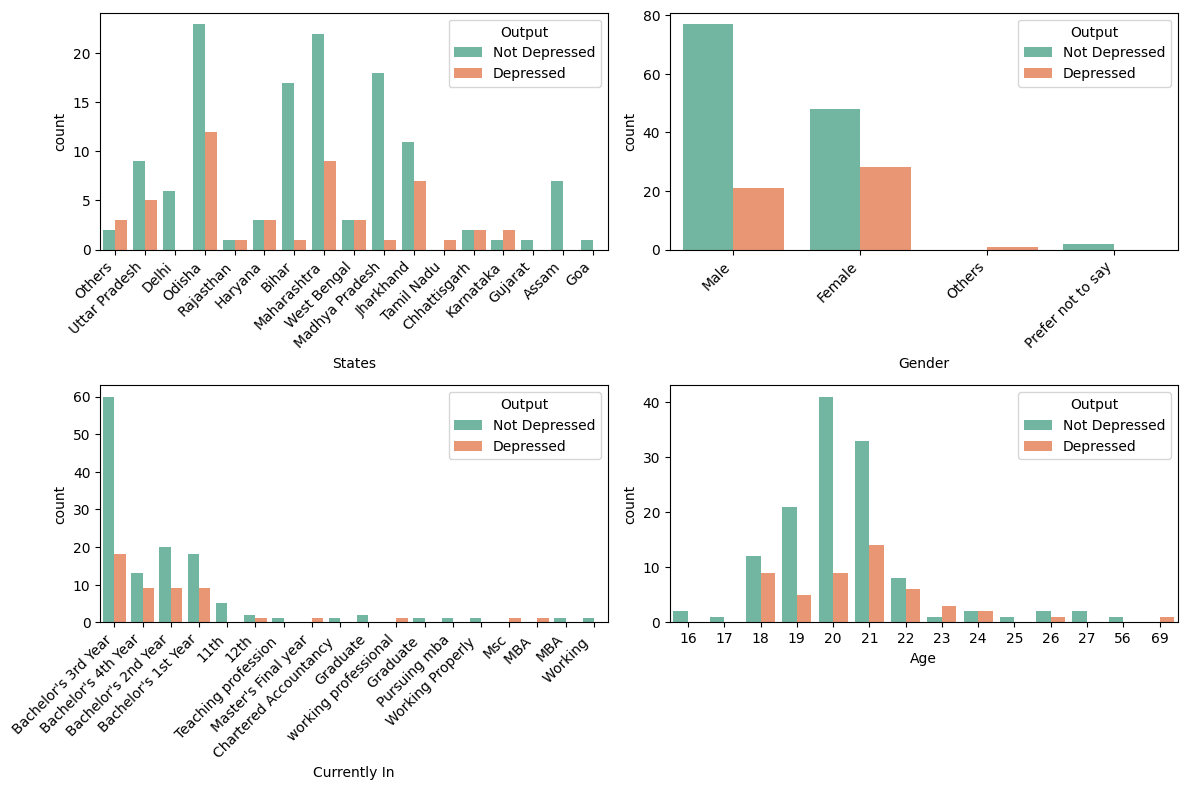

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Plotting using matplotlib
custom_palette = ["#66c2a5", "#fc8d62"] 
sns.set_palette(custom_palette)

# Plotting using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='X3', hue='Output', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('States')
plt.legend(title='Output', labels=['Not Depressed', 'Depressed'])

plt.subplot(2, 2, 2)
sns.countplot(x='X4', hue='Output', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Gender')
plt.legend(title='Output', labels=['Not Depressed', 'Depressed'])

plt.subplot(2, 2, 3)
sns.countplot(x='X5', hue='Output', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Currently In')
plt.legend(title='Output', labels=['Not Depressed', 'Depressed'])

plt.subplot(2, 2, 4)
sns.countplot(x='X2', hue='Output', data=data)
plt.xlabel('Age')
plt.legend(title='Output', labels=['Not Depressed', 'Depressed'])

plt.tight_layout()
plt.show()